<a href="https://colab.research.google.com/github/fox2056/data-science-bootcamp/blob/main/deep_learning_ts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns

In [60]:
data = pd.read_csv('/content/SolarTimeSeriesData.csv',
                   parse_dates=['Datetime'],
                   index_col='Datetime')
series = data['Incoming Solar']

In [61]:
series[series > 0]

,Incoming Solar
Datetime,
2007-10-01 07:00:00,1.0
2007-10-01 08:00:00,18.5
2007-10-01 09:00:00,35.4
2007-10-01 10:00:00,63.8
2007-10-01 11:00:00,99.4
...,...
2013-09-30 14:00:00,556.2
2013-09-30 15:00:00,508.4
2013-09-30 16:00:00,249.7


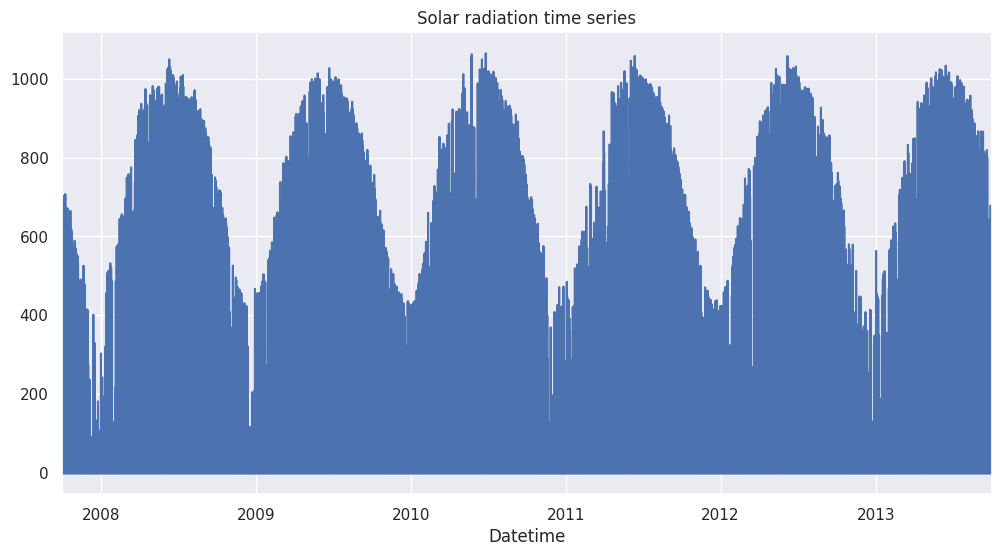

In [62]:
series.plot(figsize=(12, 6), title='Solar radiation time series');

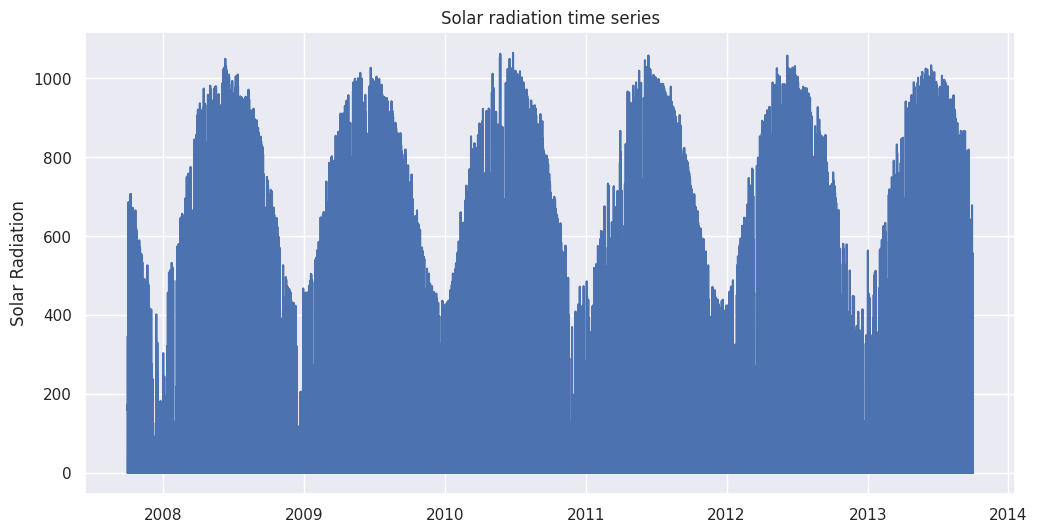

<Figure size 1200x600 with 0 Axes>

In [63]:
import matplotlib.pyplot as plt

series_df = series.reset_index()

plt.rcParams['figure.figsize'] = [12, 6]

sns.set_theme(style='darkgrid')
sns.lineplot(x='Datetime', y='Incoming Solar', data=series_df)

plt.ylabel('Solar Radiation')
plt.xlabel('')
plt.title('Solar radiation time series')

plt.show()

plt.savefig('/content/time_series_plot.png')

In [64]:
series_daily = series.resample('D').sum()

### simulation of sale events

In [65]:
n_sales = 1000
start = pd.Timestamp('2023-01-01 09:00')
end = pd.Timestamp('2023-04-01')
n_days = (end - start).days + 1

irregular_series = pd.to_timedelta(np.random.rand(n_sales) * n_days,
                                   unit='D') + start
irregular_series

DatetimeIndex(['2023-02-23 22:03:56.573757694',
               '2023-01-16 12:15:46.221275914',
               '2023-01-25 07:06:16.727293831',
               '2023-03-13 09:16:30.675544066',
               '2023-02-14 05:20:59.290905405',
               '2023-02-11 21:40:29.350515397',
               '2023-03-16 15:29:18.015378878',
               '2023-01-16 09:26:00.969770365',
               '2023-02-02 18:44:12.681266795',
               '2023-01-19 21:45:57.069274308',
               ...
               '2023-01-08 16:57:15.124336787',
               '2023-02-17 08:43:09.374152442',
               '2023-02-10 05:24:46.693109551',
               '2023-01-12 23:37:14.742907115',
               '2023-02-21 01:58:24.427008505',
               '2023-02-22 00:38:23.049886807',
               '2023-02-20 07:35:51.554779920',
               '2023-03-19 21:29:21.118668910',
               '2023-03-06 05:58:21.500772121',
               '2023-01-03 10:55:46.868773218'],
              dtype=

In [66]:
ts_sales = pd.Series(0, index=irregular_series)
tot_sales = ts_sales.resample('D').count()

tot_sales

,0
2023-01-01,3
2023-01-02,11
2023-01-03,8
2023-01-04,12
2023-01-05,9
...,...
2023-03-28,14
2023-03-29,12
2023-03-30,10
2023-03-31,15


### Continue

In [67]:
series_daily

,Incoming Solar
Datetime,
2007-10-01,1381.5
2007-10-02,3953.2
2007-10-03,3098.1
2007-10-04,2213.9
2007-10-05,1338.8
...,...
2013-09-26,1034.2
2013-09-27,2182.3
2013-09-28,3384.5


### Dealing with missing values

In [68]:
sample_with_nan = series_daily.head(365 * 2).copy()
size_na = int(0.6 * len(sample_with_nan))

idx = np.random.choice(a=range(len(sample_with_nan)),
                       size=size_na,
                       replace=False)

sample_with_nan[idx] = np.nan

sample_with_nan

/tmp/ipython-input-4085273064.py:8: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  sample_with_nan[idx] = np.nan


,Incoming Solar
Datetime,
2007-10-01,NaN
2007-10-02,NaN
2007-10-03,NaN
2007-10-04,NaN
2007-10-05,1338.8
...,...
2009-09-25,4807.7
2009-09-26,4801.0
2009-09-27,4849.2


In [69]:
average_value = sample_with_nan.mean()
imp_mean = sample_with_nan.fillna(average_value)
imp_mean

,Incoming Solar
Datetime,
2007-10-01,3635.811644
2007-10-02,3635.811644
2007-10-03,3635.811644
2007-10-04,3635.811644
2007-10-05,1338.800000
...,...
2009-09-25,4807.700000
2009-09-26,4801.000000
2009-09-27,4849.200000


In [70]:
imp_ffill = sample_with_nan.ffill()
imp_bfill = sample_with_nan.bfill()

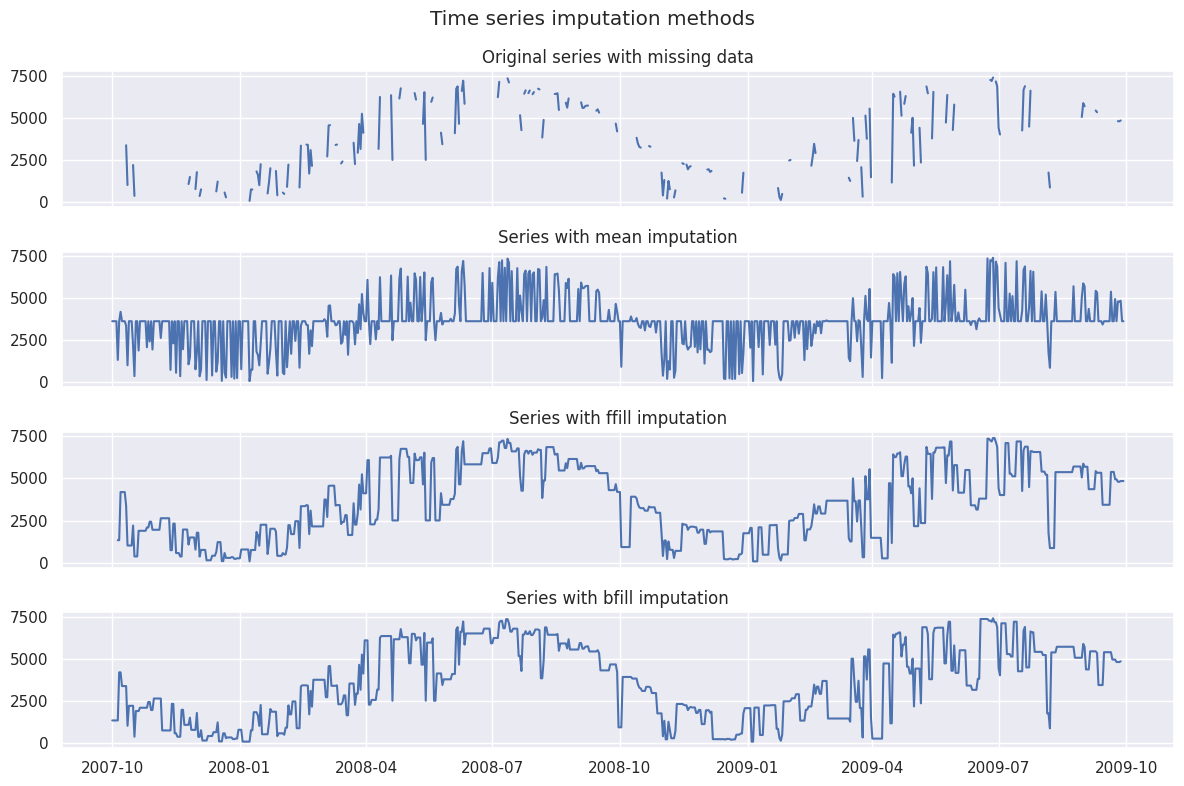

In [71]:
plt.rcParams['figure.figsize'] = [12, 8]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, sharex=True)
fig.suptitle('Time series imputation methods')

ax0.plot(sample_with_nan)
ax0.set_title('Original series with missing data')
ax1.plot(imp_mean)
ax1.set_title('Series with mean imputation')
ax2.plot(imp_ffill)
ax2.set_title('Series with ffill imputation')
ax3.plot(imp_bfill)
ax3.set_title('Series with bfill imputation')

plt.tight_layout()

plt.savefig('/content/missing_data_plot.png')

### Continue

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(x=series_daily,
                            model='additive',
                            period=365)

result

<Axes: xlabel='Datetime'>

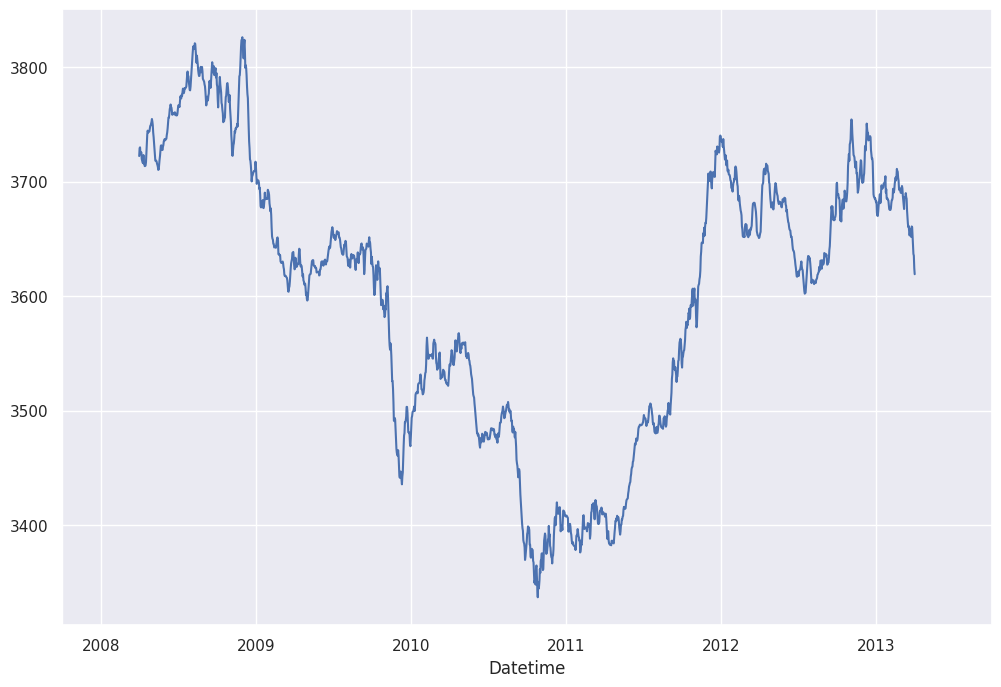

In [73]:
result.trend.plot()

<Axes: xlabel='Datetime'>

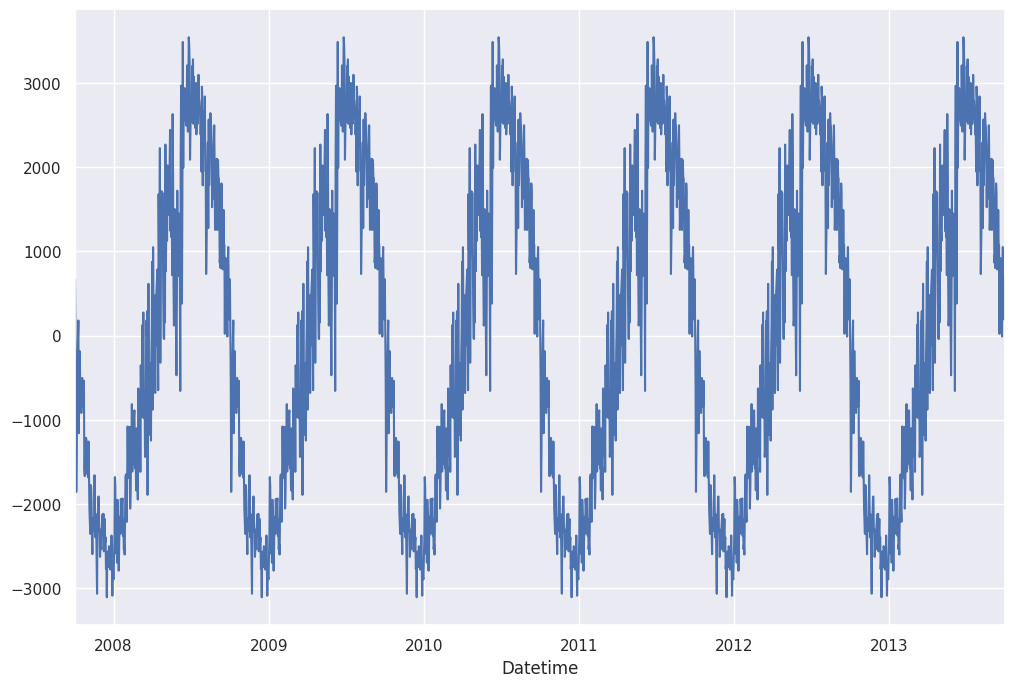

In [74]:
result.seasonal.plot()

<Axes: xlabel='Datetime'>

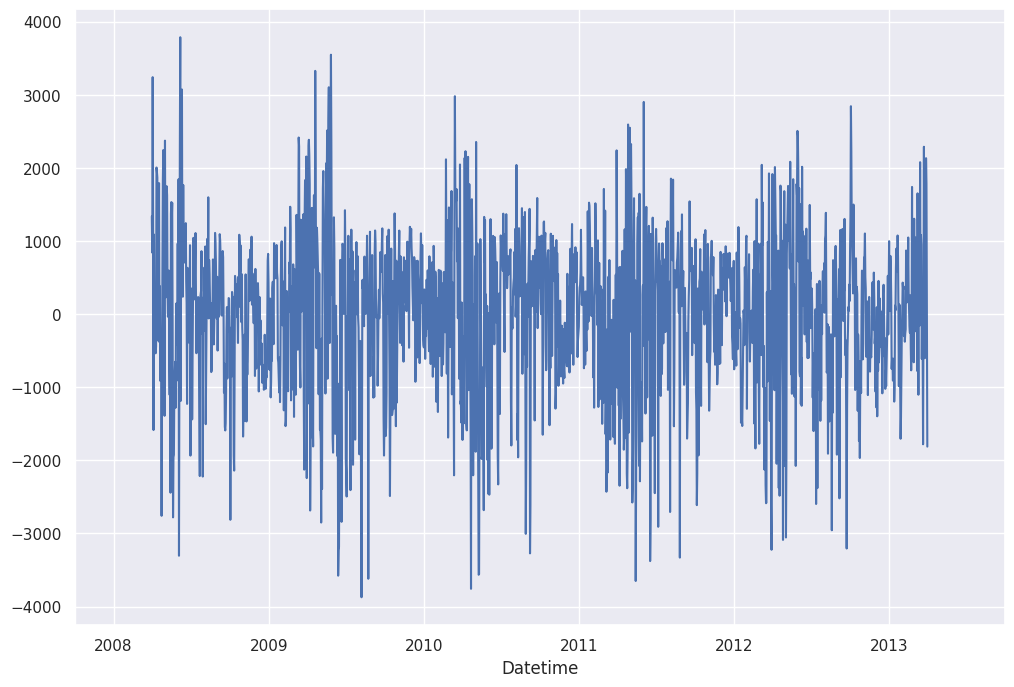

In [75]:
result.resid.plot()

In [76]:
from statsmodels.tsa.seasonal import STL

result = STL(endog=series_daily, period=365).fit()

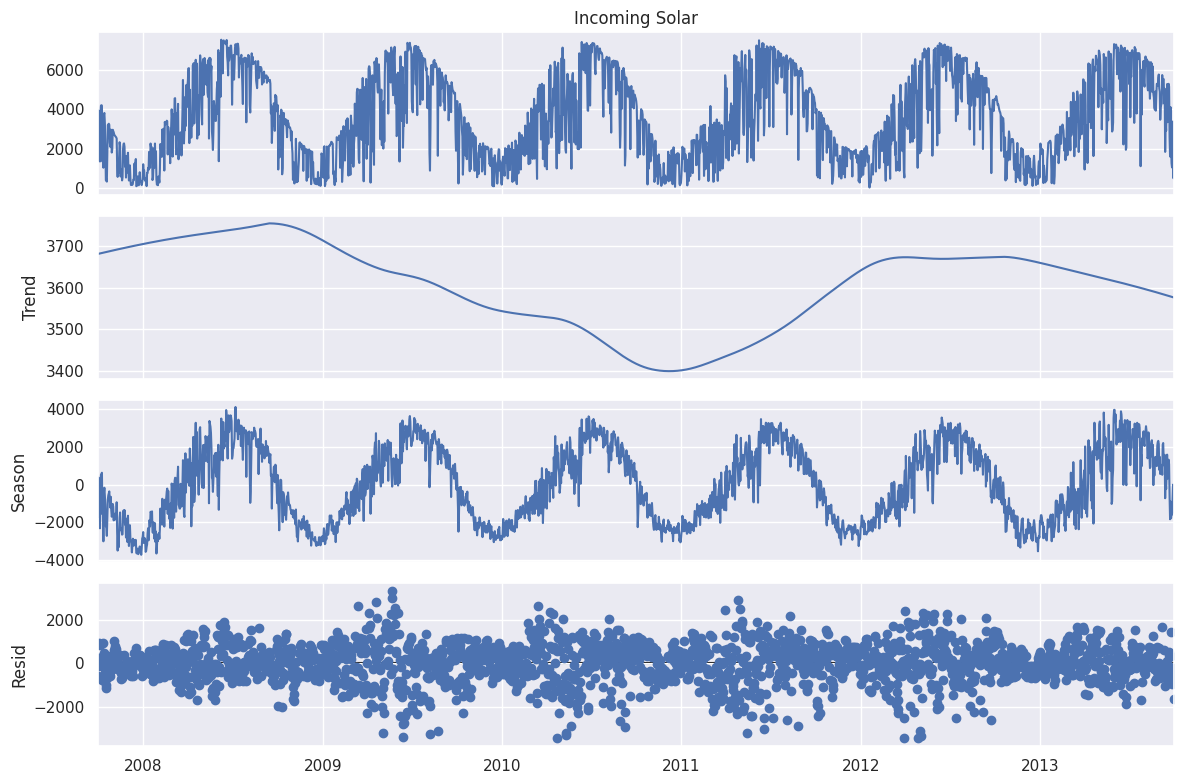

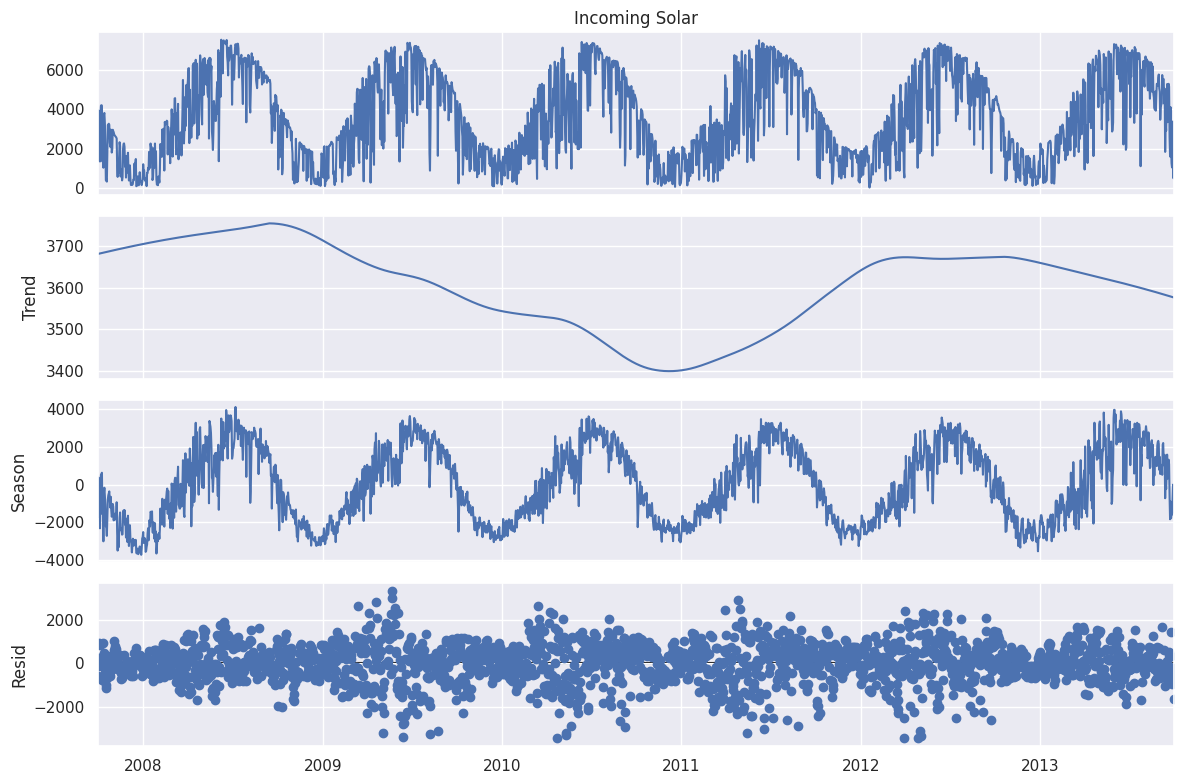

In [77]:
result.plot()

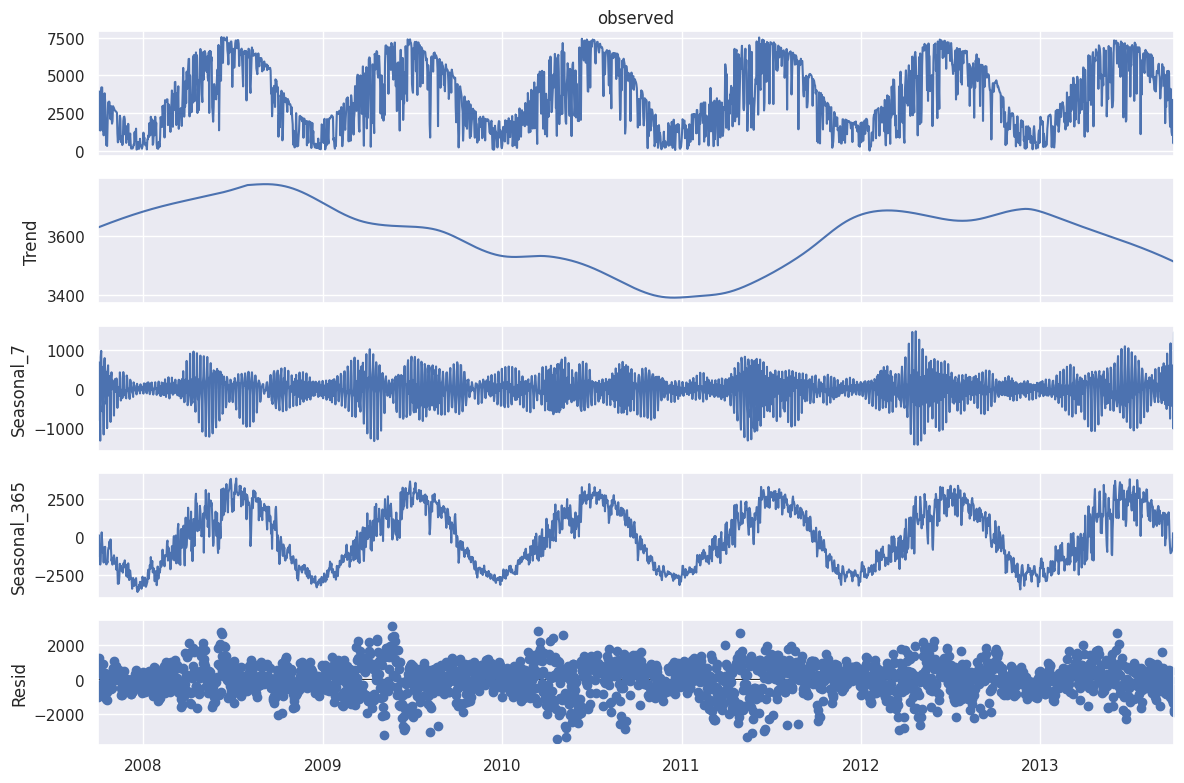

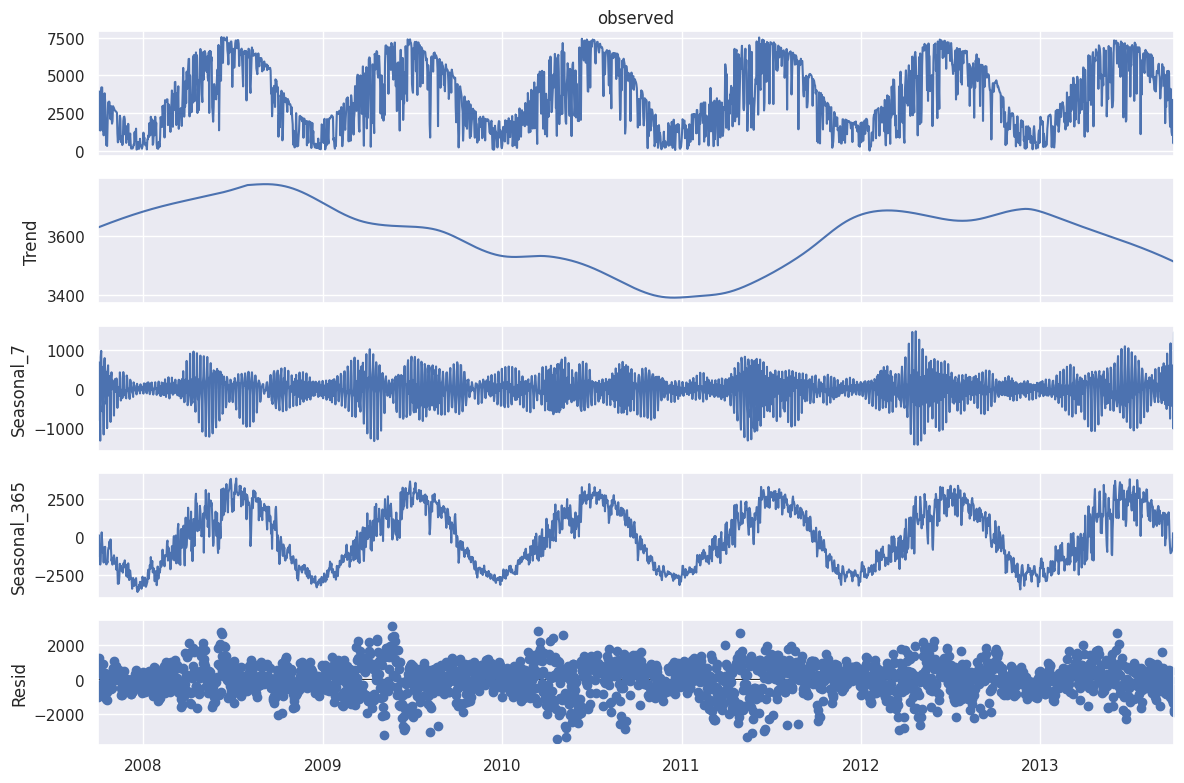

In [78]:
from statsmodels.tsa.seasonal import MSTL

result = MSTL(endog=series_daily, periods=(7, 365)).fit()

result.plot()

In [79]:
from statsmodels.tsa.stattools import acf

acf_scores = acf(x=series_daily, nlags=365)

In [80]:
from statsmodels.tsa.stattools import pacf

pacf_scores = pacf(x=series_daily, nlags=365)

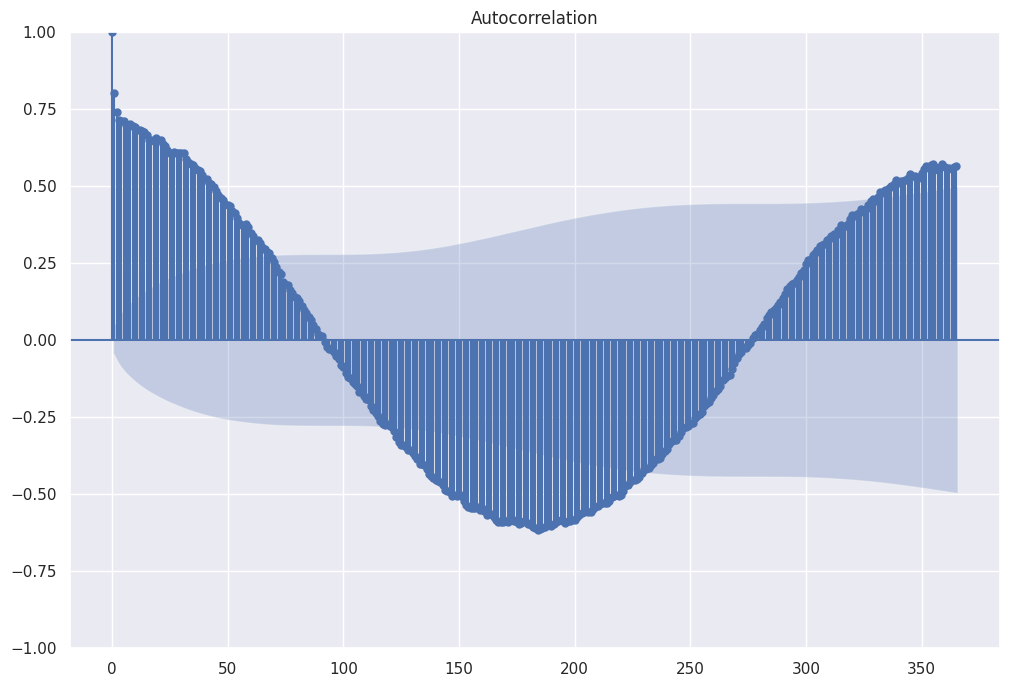

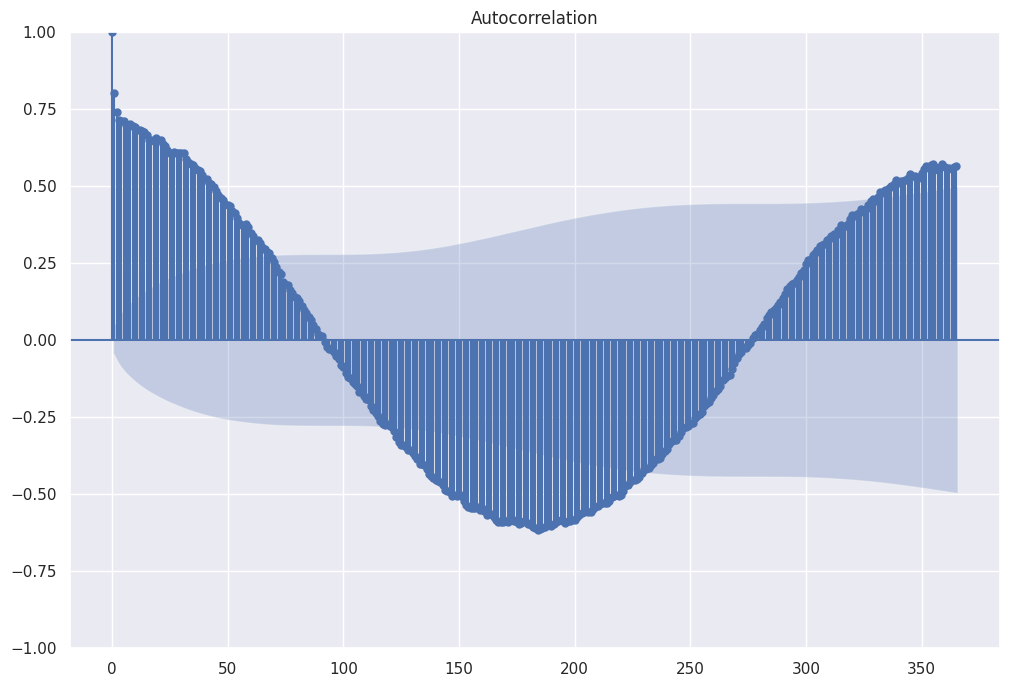

In [81]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(x=series_daily, lags=365)

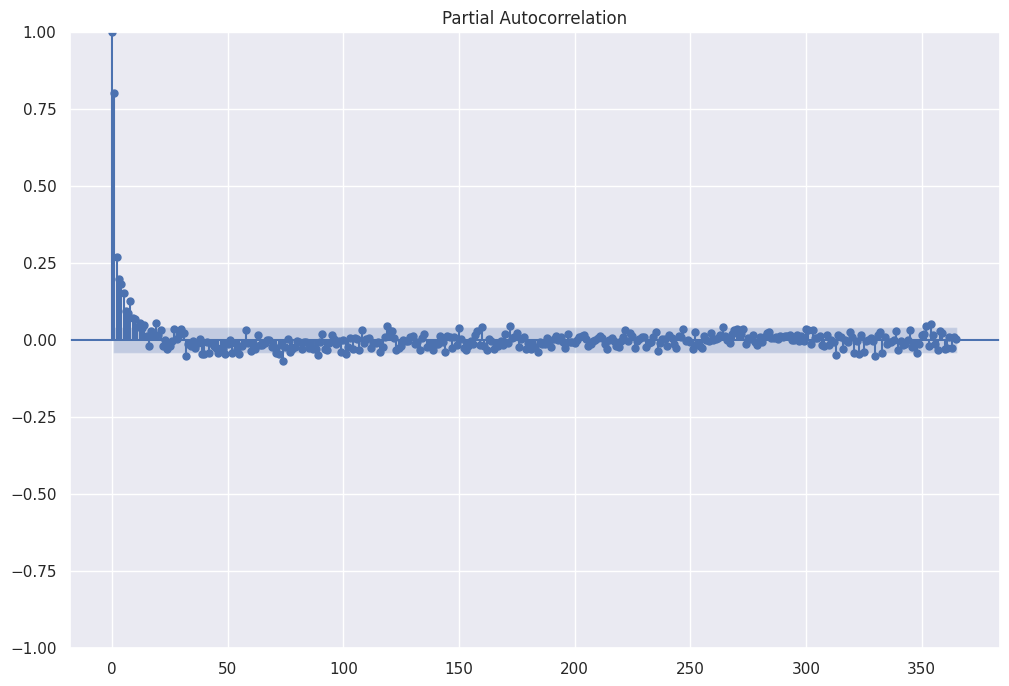

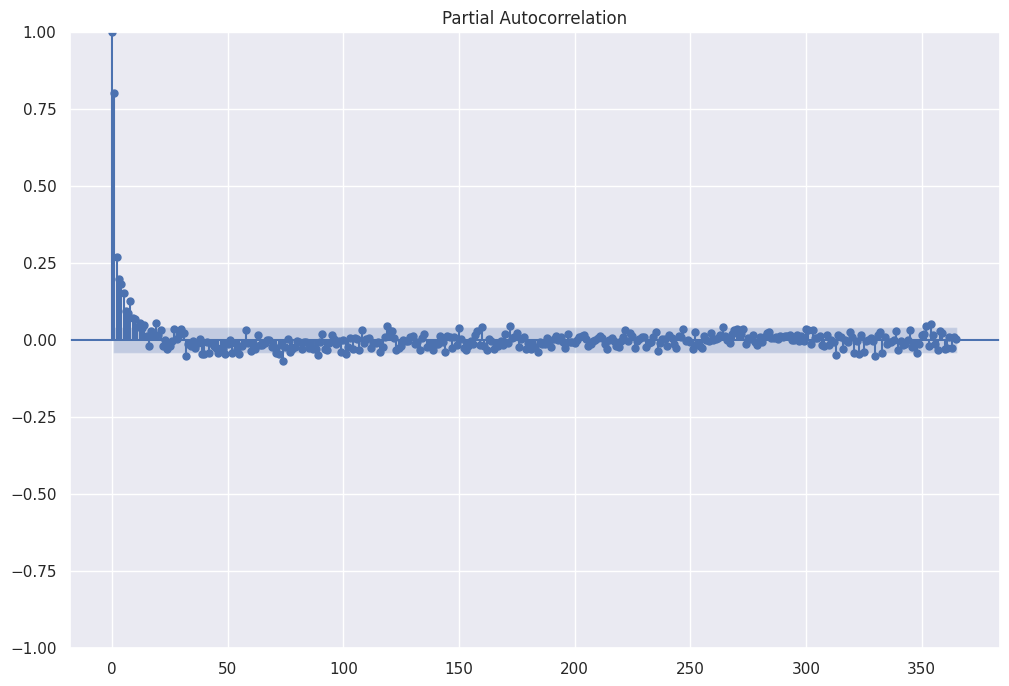

In [82]:
plot_pacf(x=series_daily, lags=365)

In [83]:
!pip install --upgrade --no-deps --force-reinstall pmdarima

from pmdarima.arima import ndiffs

  Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.3 MB)
  Attempting uninstall: pmdarima
    Found existing installation: pmdarima 2.0.4
    Uninstalling pmdarima-2.0.4:
      Successfully uninstalled pmdarima-2.0.4


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
ndiffs(x=series_daily, test='adf')